# **Importing Libraries**


So, inorder to perform anything on the data we must require to import the librarires first and set the diplay view of the dataset.

### Install Pandas Profiling

In [26]:
# Install Pandas Profiling library from GitHub using pip
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


### Import Libraries

This code snippet imports necessary Python libraries, `sets display options for Pandas`, and prepares the environment for data analysis and visualization.

In [27]:
# Importing required libraries for data analysis and visualization
import pandas as pd                         # Pandas for data manipulation and analysis
import numpy as np                          # NumPy for numerical operations
import matplotlib.pyplot as plt             # Matplotlib for basic plotting
import seaborn as sns                       # Seaborn for statistical data visualization
import plotly.express as px                 # Plotly Express for interactive visualizations
import re                                   # Import the regular expression module
import warnings                             # Import warnings module for handling warnings
import ydata_profiling                     # Pandas Profiling for automated exploratory data analysis
from ydata_profiling import ProfileReport  # Importing ProfileReport class from pandas_profiling module
from scipy import stats                     # SciPy for scientific and technical computing

# Ignore all warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# **Loading Dataset**

After importing librarires, we will import the data using `GitHub` link of raw file

Continuing the setup for data analysis by adjusting `Pandas display options` and then loads a dataset into a `Pandas` DataFrame.

In [28]:
# Display all columns without truncation
pd.set_option('display.max_columns', None)

# Load related dataset from location into multiple DataFrame

df = pd.read_csv('hourly_stats_data.csv', encoding='unicode_escape')


Inspecting the columns present in every dataset.

In [29]:
# Display random row from dataframe
df.sample(5)

id activity_day activity_hour  calories  total_intensity  \
523    1503960366   2016-05-03         19:00        58                5   
3647   2022484408   2016-04-12         19:00        83                9   
16137  6962181067   2016-04-17         10:00       114               22   
16843  7007744171   2016-04-16         08:00        85                8   
10311  4388161847   2016-05-07         14:00        87                0   

       average_intensity  step_total  
523                 0.08         140  
3647                0.15         196  
16137               0.37        1095  
16843               0.13         107  
10311               0.00           0

To view the columns inside the file

In [30]:
# Viewing the columns of the dataframe
for i in df.columns:
  print(i)

id
activity_day
activity_hour
calories
total_intensity
average_intensity
step_total


#**Statistics & Data Vizualization**

## **Theoretical Data Analysis**

### 1.1. Descriptive Numeric Analysis

This code generates descriptive statistics, such as **mean, standard deviation, minimum, and maximum values**, for numerical columns in the '`df`' DataFrame.

In [31]:
# Generate descriptive statistics for numerical columns in the 'df' DataFrame
df.describe()

id  calories  total_intensity  average_intensity  step_total
count      22099.00  22099.00         22099.00           22099.00    22099.00
mean  4848235270.22     97.39            12.04               0.20      320.17
std   2422500401.42     60.70            21.13               0.35      690.38
min   1503960366.00     42.00             0.00               0.00        0.00
25%   2320127002.00     63.00             0.00               0.00        0.00
50%   4445114986.00     83.00             3.00               0.05       40.00
75%   6962181067.00    108.00            16.00               0.27      357.00
max   8877689391.00    948.00           180.00               3.00    10554.00

**Observation:**<br>
Here we get a statistical data for all the numerics value.

### 1.2. Descriptive Object Analysis

This code generates descriptive statistics for categorical columns in the '`df`' DataFrame, including **count, unique values, top value, and frequency**.

In [32]:
# Generate descriptive statistics for categorical columns in the DataFrame
df.describe(include=['object'])

activity_day activity_hour
count         22099         22099
unique           31            24
top      2016-04-12         00:00
freq            792           934

**Observation:**<br>
This type of description shows the frequency of each column which is object, their frequency and the leader for every column.

### 2. Top Users by Calories Burnt per Hour

Identify users with the highest calories burnt on hourly basis

In [33]:
# Create an empty list to store DataFrames
dfs = []

# Iterate over unique days and hours and find the top user for each day and hour
for day in df['activity_day'].unique():
    for hour in df['activity_hour'].unique():
        # Subset the data for the current day and hour
        hourly_data = df[(df['activity_day'] == day) & (df['activity_hour'] == hour)]

        if not hourly_data.empty:
            # Find the top user with the maximum calories for the current day and hour
            top_user = hourly_data.nlargest(1, 'calories')[['activity_day', 'activity_hour', 'id', 'calories']]

            # Append the top result to the list
            dfs.append(top_user)

# Concatenate all DataFrames in the list into a single DataFrame
top_users_per_day_hour = pd.concat(dfs, ignore_index=True)

# Display the top user for each day and hour
print(top_users_per_day_hour)

    activity_day activity_hour          id  calories
0     2016-04-12         00:00  8378563200        91
1     2016-04-12         01:00  8378563200       100
2     2016-04-12         02:00  8053475328       110
3     2016-04-12         03:00  4057192912        93
4     2016-04-12         04:00  8378563200       124
..           ...           ...         ...       ...
731   2016-05-12         11:00  8877689391       192
732   2016-05-12         12:00  8877689391       321
733   2016-05-12         13:00  2022484408       152
734   2016-05-12         14:00  8053475328       388
735   2016-05-12         15:00  2022484408       129

[736 rows x 4 columns]


**Observation:**<br>
Here we can see leaderboard of the top users burning maximum calory at the hour.

### 3. Least Active Calories per Hour

Identify users with the lowest calories burnt on hourly basis

In [34]:

# Create an empty list to store DataFrames
dfs = []

# Iterate over unique days and hours and find the least user for each day and hour (excluding zero calories)
for day in df['activity_day'].unique():
    for hour in df['activity_hour'].unique():
        # Subset the data for the current day and hour with non-zero calories
        hourly_data = df[(df['activity_day'] == day) & (df['activity_hour'] == hour) & (df['calories'] > 0)]

        if not hourly_data.empty:
            # Find the least user with the minimum calories for the current day and hour
            least_user = hourly_data.nsmallest(1, 'calories')[['activity_day', 'activity_hour', 'id', 'calories']]

            # Append the least result to the list
            dfs.append(least_user)

# Concatenate all DataFrames in the list into a single DataFrame
least_users_per_day_hour = pd.concat(dfs, ignore_index=True)

# Display the least user for each day and hour
print(least_users_per_day_hour)


    activity_day activity_hour          id  calories
0     2016-04-12         00:00  2026352035        48
1     2016-04-12         01:00  3977333714        42
2     2016-04-12         02:00  3977333714        42
3     2016-04-12         03:00  3977333714        44
4     2016-04-12         04:00  3977333714        42
..           ...           ...         ...       ...
731   2016-05-12         11:00  1624580081        50
732   2016-05-12         12:00  1624580081        65
733   2016-05-12         13:00  8053475328        77
734   2016-05-12         14:00  2320127002        83
735   2016-05-12         15:00  1624580081        63

[736 rows x 4 columns]


**Observation:**<br>
Here we see the leader board for the individuals burning less calories for the given hour [non 0]

### 4. Top & Bottom Users of Steps

Finding the top and bottom users with most and least steps in an hour

In [35]:

# Create an empty list to store DataFrames
dfs = []

# Find the top 5 users with the maximum total steps
top_users = df.nlargest(5, 'step_total')[['id', 'activity_day', 'activity_hour', 'step_total']]
dfs.append(top_users)

# Find the bottom 5 users with the minimum total steps (excluding zero steps)
low_users = df[df['step_total'] > 0].nsmallest(5, 'step_total')[['id', 'activity_day', 'activity_hour', 'step_total']]
dfs.append(low_users)

# Concatenate all DataFrames in the list into a single DataFrame
top_and_low_users = pd.concat(dfs, ignore_index=True)

# Display the top 5 and bottom 5 users based on total steps (excluding zero steps)
print(top_and_low_users)

           id activity_day activity_hour  step_total
0  8877689391   2016-04-30         14:00       10554
1  8877689391   2016-05-06         14:00        9769
2  8877689391   2016-04-19         16:00        9392
3  8877689391   2016-04-24         17:00        9062
4  1624580081   2016-05-01         09:00        8976
5  1644430081   2016-05-09         01:00           1
6  1644430081   2016-05-09         02:00           1
7  1644430081   2016-05-09         03:00           1
8  1644430081   2016-05-09         04:00           1
9  1644430081   2016-05-09         05:00           1


**Observation:**<br>
User ID eding with 91, is seem to have most steps during an hour in the session. While User ID ending with 81, seem to have least.

### 5. Statistical Activity

Identify the statistics of the Activities

In [36]:
# Select relevant columns
activity_columns = ['calories', 'total_intensity', 'step_total']

# Calculate mean, median, and standard deviation
activity_stats = df[activity_columns].agg(['mean', 'median', 'std']).transpose()

# Display the results
print(activity_stats)

                  mean  median    std
calories         97.39   83.00  60.70
total_intensity  12.04    3.00  21.13
step_total      320.17   40.00 690.38


**Observation:**<br>
Displaying the statistical values of the numeric values of dataframe.

### 6. Correlational analysis

Measure the correlation between the calories, total_intensity and step_total

In [37]:
# Calculate correlation between 'calories', 'total_intensity' and 'step_total' columns
burn_analysis = df[['calories', 'total_intensity', 'step_total']].corr()

# Display the correlation analysis results
burn_analysis

calories  total_intensity  step_total
calories             1.00             0.90        0.81
total_intensity      0.90             1.00        0.90
step_total           0.81             0.90        1.00

**Observation:**<br>
Viewing the correlational analysis between the calories burnt, intensity hourly and total step in an hour.

### 7. Outliers Detection

Identify the outliers in relevant columns.

In [38]:
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Create an empty dictionary to store outliers for each column
all_outliers = {}

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Identify and store outliers for the current column
        outliers = df[column][np.abs(stats.zscore(df[column])) > z_score_threshold]
        all_outliers[column] = outliers

# Display the dictionary of outliers for each column
for column, outliers in all_outliers.items():
    print(f"Outliers in {column}:\n{outliers}\n")

Outliers in id:
Series([], Name: id, dtype: int64)

Outliers in calories:
261      311
379      318
1180     336
1181     369
1182     374
        ... 
22029    403
22072    402
22076    310
22077    835
22096    321
Name: calories, Length: 449, dtype: int64

Outliers in total_intensity:
95        95
109       90
140       87
162      114
236       92
        ... 
21977    180
22028    133
22072     96
22077    163
22096     93
Name: total_intensity, Length: 544, dtype: int64

Outliers in average_intensity:
95      1.58
109     1.50
140     1.45
162     1.90
236     1.53
        ... 
21977   3.00
22028   2.22
22072   1.60
22077   2.72
22096   1.55
Name: average_intensity, Length: 544, dtype: float64

Outliers in step_total:
69       2670
95       2768
109      3616
137      2613
140      2955
         ... 
22048    2508
22072    3929
22076    2869
22077    8357
22096    3135
Name: step_total, Length: 513, dtype: int64



**Observation:**<br>
Viewing the outliers present within the dataframe.

### 8. Average Metrics by User

Calculate average values for key metrics grouped by user.

In [39]:

# Exclude non-numeric columns from the DataFrame before calculating the mean
numeric_df = df.select_dtypes(include=['number'])

# Group the DataFrame by 'id' and calculate the mean for each group
average_metrics_by_user = numeric_df.groupby('id').mean()

# Display the resulting DataFrame with average metrics for each user
print(average_metrics_by_user)

            calories  total_intensity  average_intensity  step_total
id                                                                  
1503960366     78.50            16.17               0.27      522.38
1624580081     62.47             8.04               0.13      241.51
1644430081    118.82            10.52               0.18      307.81
1844505072     66.60             5.02               0.08      109.36
1927972279     91.50             1.86               0.03       38.59
2022484408    105.48            17.03               0.28      477.87
2026352035     64.91            10.81               0.18      233.79
2320127002     72.56             8.74               0.15      198.69
2347167796     88.72            14.52               0.24      413.86
2873212765     80.24            15.10               0.25      318.11
3372868164     81.76            15.38               0.26      290.38
3977333714     65.09            15.23               0.25      471.61
4020332650    101.00             4

**Observation:**<br>
Here we view the average metric for an individual user.

## **Data Vizualization**

### 1. Heatmap

Visualizing the Steps with Heat Map

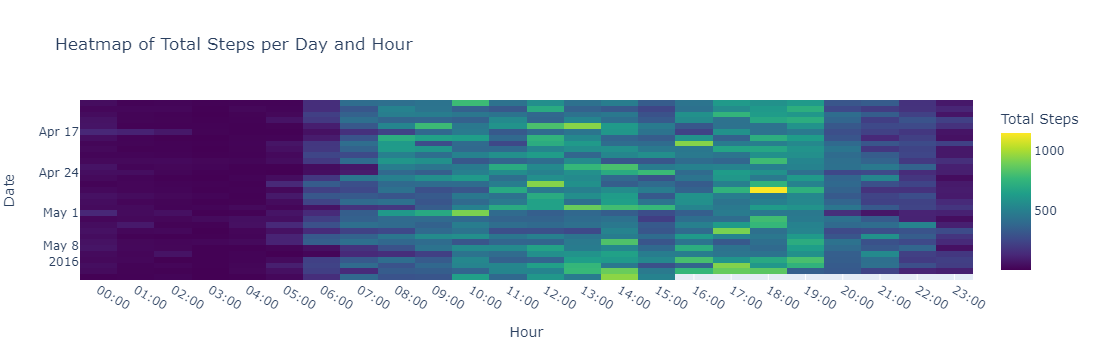

In [40]:
# Create a heatmap using Plotly Express to visualize Total Steps per Day and Hour
fig = px.imshow(df.pivot_table(index='activity_day', columns='activity_hour', values='step_total'),
                labels=dict(color='Total Steps'),
                color_continuous_scale='viridis',
                title='Heatmap of Total Steps per Day and Hour',
                x=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00',
                   '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
                   '20:00', '21:00', '22:00', '23:00'])

# Customize the axis titles
fig.update_xaxes(title_text='Hour')
fig.update_yaxes(title_text='Date')

# Show the generated heatmap
fig.show()


**Observation:**<br>
Mostly people, make steps during the day as compared to night.

Visualizing the Calories with Heat Map

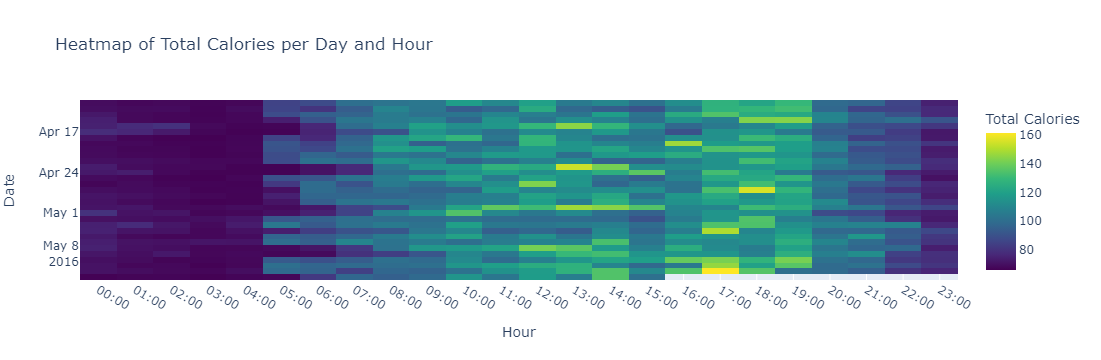

In [41]:
# Create a heatmap using Plotly Express to visualize Total Calories per Day and Hour
fig = px.imshow(df.pivot_table(index='activity_day', columns='activity_hour', values='calories'),
                labels=dict(color='Total Calories'),
                color_continuous_scale='viridis',
                title='Heatmap of Total Calories per Day and Hour',
                x=['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00',
                   '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
                   '20:00', '21:00', '22:00', '23:00'])

# Customize the axis titles
fig.update_xaxes(title_text='Hour')
fig.update_yaxes(title_text='Date')

# Show the generated heatmap
fig.show()

**Observation:**<br>
Most people burn calories on day.

### 2. Scatter Plot

Visualizing the Scatter Plot on Steps and Calories

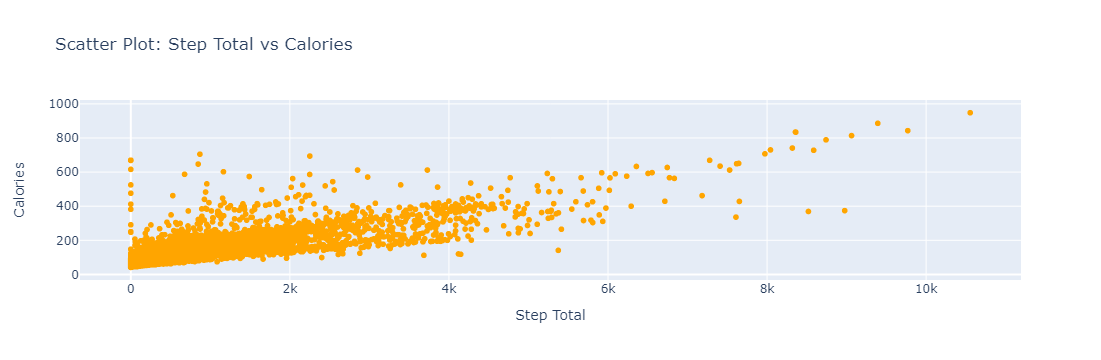

In [42]:
# Create a scatter plot using Plotly Express to visualize the relationship between 'step_total' and 'calories'
fig = px.scatter(df, x='step_total', y='calories', title='Scatter Plot: Step Total vs Calories',
                 labels={'step_total': 'Step Total', 'calories': 'Calories'},
                 color_discrete_sequence=['orange'])

# Show the generated scatter plot
fig.show()

**Observation:**<br>
On an hour, people take 0-4k steps to burn around 0-200 calories.

Visualizing the Scatter Plot on Steps and Intensity

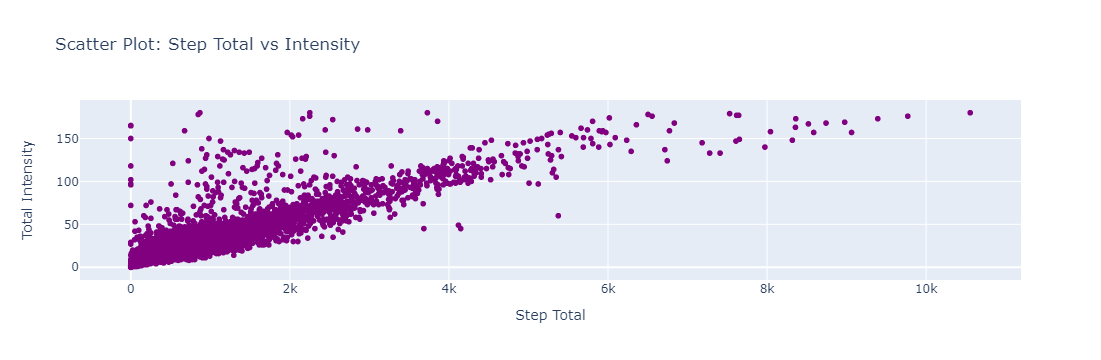

In [43]:
# Create a scatter plot using Plotly Express to visualize the relationship between 'step_total' and 'total_intensity'
fig = px.scatter(df, x='step_total', y='total_intensity', title='Scatter Plot: Step Total vs Intensity',
                 labels={'step_total': 'Step Total', 'total_intensity': 'Total Intensity'},
                 color_discrete_sequence=['purple'])

# Show the generated scatter plot
fig.show()

**Observation:**<br>
On an average of 6k steps, most people make an intensity of 0-15o.

### 3. Pair Plot

Visualizing the Pair Plot on Calories, Steps and Intensity

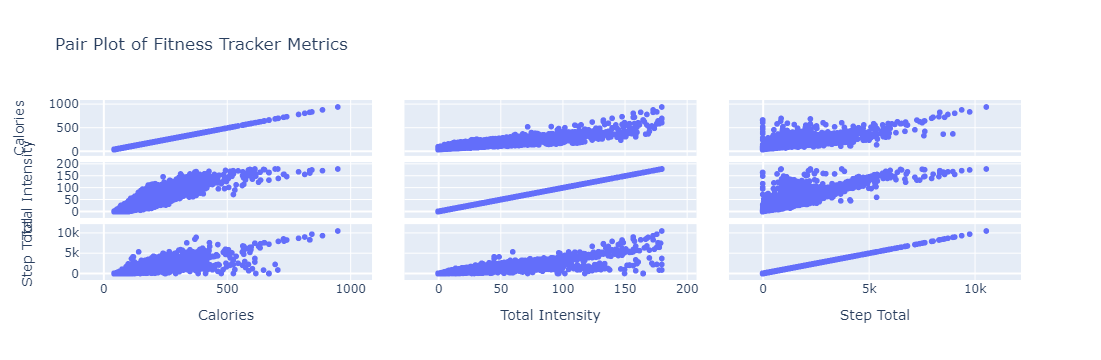

In [44]:
# Create a pair plot using Plotly Express to visualize relationships among 'calories', 'total_intensity', and 'step_total'
fig = px.scatter_matrix(df, dimensions=['calories', 'total_intensity', 'step_total'],
                        title='Pair Plot of Fitness Tracker Metrics',
                        labels={'calories': 'Calories', 'total_intensity': 'Total Intensity',
                                'step_total': 'Step Total'})

# Show the generated pair plot
fig.show()

**Observation:**<br>
Viewing the pairplots of the Calories burnt, Total Intensity and Total Steps made.

### 4. Bar Plot

Visualizing the Bar Plot on Hour and Calories

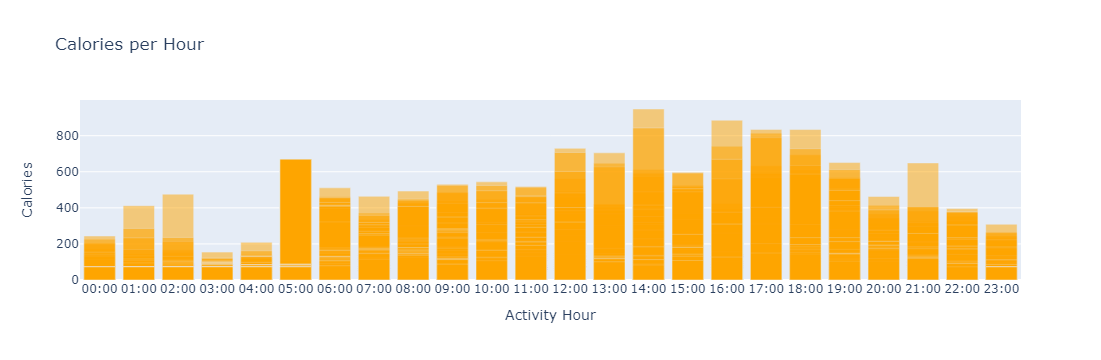

In [25]:
# Create a bar plot using Plotly Express to visualize calories per hour
fig1 = px.bar(df, x='activity_hour', y='calories', title='Calories per Hour',
              labels={'activity_hour': 'Activity Hour', 'calories': 'Calories'},
              barmode='overlay', color_discrete_sequence=['orange'])

# Show the generated bar plot
fig1.show()

**Observation:**<br>
Most people burn calories on day. At night calories burnt seem to be fishy :) Maybe they do night shifts.

Visualizing the Bar Plot on Hour and Intensity

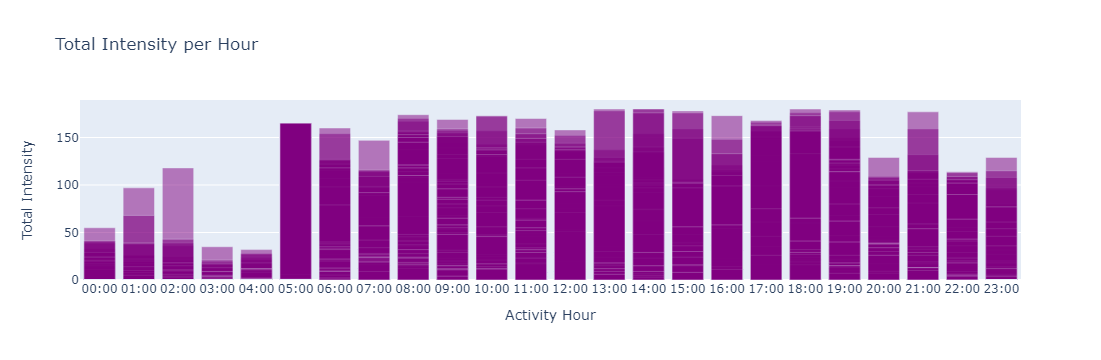

In [45]:
# Create a bar plot using Plotly Express to visualize total intensity per hour
fig2 = px.bar(df, x='activity_hour', y='total_intensity', title='Total Intensity per Hour',
              labels={'activity_hour': 'Activity Hour', 'total_intensity': 'Total Intensity'},
              barmode='overlay', color_discrete_sequence=['purple'])

# Show the generated bar plot
fig2.show()

**Observation:**<br>
People are most intense about their work during the day.

Visualizing the Bar Plot on Hour and Steps

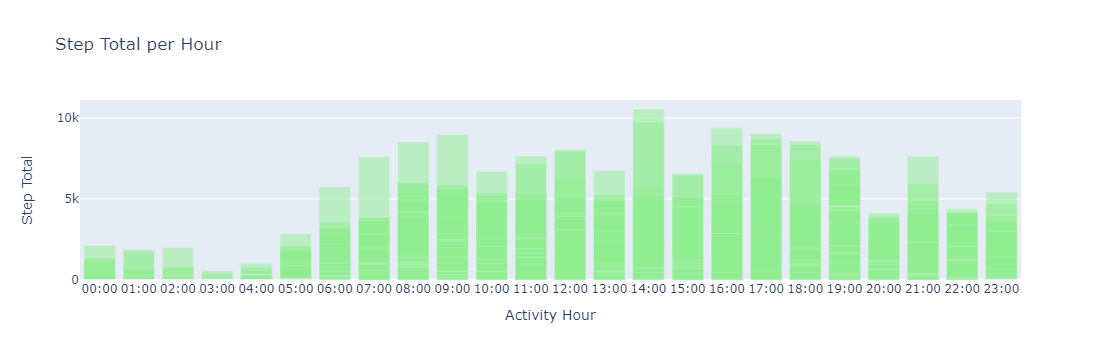

In [46]:
# Create a bar plot using Plotly Express to visualize step total per hour
fig3 = px.bar(df, x='activity_hour', y='step_total', title='Step Total per Hour',
              labels={'activity_hour': 'Activity Hour', 'step_total': 'Step Total'},
              barmode='overlay', color_discrete_sequence=['lightgreen'])

# Show the generated bar plot
fig3.show()

**Observation:**<br>
Few people seem to walk at night.Most people work during the day. Peak hour at 2 P.M

## **Pandas Profiling**

Generating a whole report on HTML using Pandas Profiling

In [ ]:
# Generate a Pandas Profiling report for the DataFrame and customize the title and HTML output file
profile = ProfileReport(df, title="Hourly Stats", html={'style' : {'full_width':True}})

# Save the generated report to an HTML file named "Daily Activity.html"
profile.to_file(output_file="Hourly Activity.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]